
# Nadaraya-Watson model

## Parzen density estimator

Suppose we have a training set $\{\mathbf{x}_n, t_n\}$ and we use a Parzen density estimator to model the joint disribution $p(\mathbf{x}, t)$, so that

$$p(\mathbf{x},t) = \frac{1}{N}\sum_{n=1}^N f(\mathbf{x}-\mathbf{x}_n, t-t_n) \tag{6.42}$$

which we discussed in Section 2.5.1. And this formula can be intepreted in two different ways.

- From the perspective of Parzen window method, the joint distribution $p(\mathbf{x},t)$ is the rate of the training data set that lie in the region centered on $(\mathbf{x},t)$.
- From the prespective of kernel method, the joint distribution $p(\mathbf{x},t)$ is an average combination of the component density function $f(\mathbf{x}, t)$ that shifted by $(\mathbf{x}_n, t_n)$.

## Kernel formula for regression function

Our goal is to find an expression for the regression function, corresponding to the conditional average of the target variable conditioned on the input variable, which is given by.

$$\begin{align*}
y(\mathbf{x}) = \mathbb{E}[t|\mathbf{x}] 
&= \int_{-\infty}^{\infty}tp(t|\mathbf{x})dt \\
&= \int_{-\infty}^{\infty}t\frac{p(\mathbf{x}, t)}{p(\mathbf{x})}dt\\
&= \frac{\int tp(\mathbf{x}, t)dt}{\int p(\mathbf{x}, t)dt}\\
&= \frac{\sum_n \int tf(\mathbf{x}-\mathbf{x}, t-t_n)dt}{\sum_m \int f(\mathbf{x}-\mathbf{x}_m, t-t_m)dt} \tag{6.43}\\
\end{align*}$$

<font color='red'>We now assume for simplicity that the component density functions have zero mean</font> so that

$$\int_{-\infty}^{\infty} f(\mathbf{x}, t)tdt = 0 \tag{6.44}$$

Then $y(\mathbf{x})$ can be simplified.

$$\begin{align*}
y(\mathbf{x}) &= \frac{\sum_n \int tf(\mathbf{x}-\mathbf{x}, t-t_n)dt}{\sum_m \int f(\mathbf{x}-\mathbf{x}_m, t-t_m)dt}\\
&=\frac{\sum_n \int (t'+t_n)f(\mathbf{x}-\mathbf{x}, t')dt'}{\sum_m \int f(\mathbf{x}-\mathbf{x}_m, t-t_m)dt}\qquad \text{let} t'=t-t_n\\
&=\frac{\sum_n \int t'f(\mathbf{x}-\mathbf{x}, t')dt'}{\sum_m \int f(\mathbf{x}-\mathbf{x}_m, t-t_m)dt} + \frac{\sum_n \int t_n f(\mathbf{x}-\mathbf{x}, t')dt'}{\sum_m \int f(\mathbf{x}-\mathbf{x}_m, t-t_m)dt}\\
&=0+\frac{\sum_n \int f(\mathbf{x}-\mathbf{x}, t')dt'tn}{\sum_m \int f(\mathbf{x}-\mathbf{x}_m, t-t_m)dt}\\
&=\frac{\sum_n \int f(\mathbf{x}-\mathbf{x}, t-t_n)dt}{\sum_m \int f(\mathbf{x}-\mathbf{x}_m, t-t_m)dt}t_n
\end{align*}$$

Thus the kernel formula for the regression function is given by

$$\bbox[#ffe0f0]{\color{red}{y(\mathbf{x}) = \sum_n k(\mathbf{x},\mathbf{x}_n) t_n }\quad \text{ where }
k(\mathbf{x},\mathbf{x}_n) = \frac{\int f(\mathbf{x}-\mathbf{x}, t-t_n)dt}{\sum_m \int f(\mathbf{x}-\mathbf{x}_m, t-t_m)dt}} \tag{6.45,6.46,6.47}$$

which is known as the *Nadaraya-Watson* model, or <font color='red'>*kernel regression*</font>.

## Predictive distribution

$$p(t|\mathbf{x}) = \frac{p(t,\mathbf{x})}{\int p(t, \mathbf{x})dt} = \frac{\sum_n f(\mathbf{x}-\mathbf{x}_n, t-t_n)}{\sum_m\int f(\mathbf{x}-\mathbf{x}_m,t-t_m)dt}\tag{6.48}$$

-------------------

# Example

When $f(x,t)$ is a isotropic Gaussian over the variable $\mathbf{z}=(x, t)$, then $f(x, t)$ can be denoted by the multiplication of two Gaussians

$$f(x, t) = \mathcal{N}(\mathbf{z}|0, \sigma^2\mathbf{I}) = \mathcal{N}(x|0, \sigma^2)\mathcal{N}(t|0, \sigma^2)$$


The kernel hence takes the form

$$\begin{align*}
k(x, x_n) &= \frac{\int f(x-x_n, t-t_n)dt}{\sum_m \int f(x-x_m, t-t_m)dt}\\
&= \frac{\int \mathcal{N}(x-x_n|0, \sigma^2)\mathcal{N}(t-t_n|0, \sigma^2)dt}{\sum_m \int \mathcal{N}(x-x_m|0, \sigma^2)\mathcal{N}(t-t_m|0, \sigma^2)dt}\\
&= \frac{\mathcal{N}(x-x_n| 0,\sigma^2)}{\sum_m \mathcal{N}(x-x_m| 0,\sigma^2)}\\
&= \frac{\mathcal{N}(x| x_n,\sigma^2)}{\sum_m \mathcal{N}(x| x_m,\sigma^2)}
\end{align*}$$

The conditional expectation takes the form

$$y(x) = \sum_n \underbrace{\frac{\mathcal{N}(x| x_n,\sigma^2)}{\sum_m \mathcal{N}(x| x_m,\sigma^2)}}_{k(x,x_n)} t_n$$

The conditional distribution takes the form

$$p(t|x) = \sum_n \underbrace{\frac{\mathcal{N}(x| x_n,\sigma^2)}{\sum_m\mathcal{N}(x| x_m,\sigma^2)}}_{k(x,x_n)} \mathcal{N}(t| t_n,\sigma^2)$$

which is a Gaussian mixture.

The mean is 

$$\mu = \mathbb{E}[t|x] = \int t\sum_n k(x,x_n) \mathcal{N}(t|t_n,\sigma^2)dt = \sum_n k(x,x_n)\int t\mathcal{N}(t|t_n,\sigma^2)dt = \sum_n k(x,x_n) t_n$$

The variance is 

$$\begin{align*}
\text{var}[t|x] &= \mathbb{E}\big[(t-\mu)^2|x\big] \\
&= \mathbb{E}\big[t^2 + \mu^2 - 2\mu t|x\big]\\
&= \mathbb{E}[t^2|x]+\mu^2 - 2\mu\mathbb{E}[t|x]\\
&= \mathbb{E}[t^2|x]-\mu^2\\
&= \int t^2\sum_n k(x,x_n) \mathcal{N}(t|t_n,\sigma^2)dt -\mu^2\\
&= \sum_n k(x,x_n)\int t^2\mathcal{N}(t|t_n,\sigma^2)dt - \mu^2\\
&= \sum_n k(x,x_n)\int \big((t-t_n)^2-t_n^2+2tt_n\big)\mathcal{N}(t|t_n,\sigma^2)dt- \mu^2\\
&= \sum_n k(x,x_n)\left(\int (t-t_n)^2\mathcal{N}(t|t_n,\sigma^2)dt- \int t_n^2\mathcal{N}(t|t_n,\sigma^2)dt +\int 2tt_n\mathcal{N}(t|t_n,\sigma^2)dt\right)- \mu^2\\
&= \sum_n k(x,x_n)\left(\sigma^2 - t_n^2 + 2t_n^2\right)- \mu^2\\
&= \sigma^2 + \sum_n k(x,x_n)t_n^2 - \mu^2
\end{align*}$$

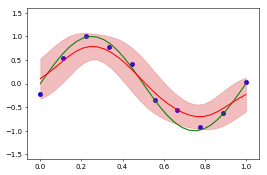

In [9]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 0.1
noise_sigma = 0.2
N = 10
Gaussian = lambda x, mu, sigma: 1/(np.sqrt(2*np.pi) * sigma)*np.exp(-(x-mu)**2/(2*sigma**2))

def kernel(x, xn):
    # x is a value, xn is an array
    G = Gaussian(x, xn, sigma)
    return G/np.sum(G)

def main():
    fig = plt.figure(figsize=(6,4), dpi=50)
    ax = fig.add_subplot(1,1,1)
    ax.set_ylim(-1.6, 1.6)
    
    #xn = np.random.uniform(0, 1, N)
    xn = np.linspace(0, 1, N)
    noise = np.random.normal(0, noise_sigma, N)
    tn = np.sin(2*np.pi*xn)+noise
    lx = np.linspace(0, 1, 30)
    ly = np.sin(2*np.pi*lx)
    
    ax.plot(lx, ly, 'g')
    ax.scatter(xn, tn, color='b')
    
    y = np.zeros(ly.shape)
    std = np.zeros(ly.shape)
    for i in range(len(lx)):
        k = kernel(lx[i], xn)
        y[i] = np.sum(k*tn)
        #print(k)
        
        # Gaussian Mixture standard derivation
        var = sigma**2 + np.sum(k*tn**2) - y[i]**2
        std[i] = np.sqrt(var)
    #print(std)
    ax.plot(lx, y, 'r')
    ax.fill_between(lx, y-std, y+std, color='C3', alpha=0.3)
    plt.show()

if __name__=="__main__":
    main()